# Обратное распространение ошибки

Фильтр на предупреждения:

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Подготовка

Импорт библиотек для работы:

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Создание и обучение простейшей нейронной сети

Задание:
1. Создать и обучить нейронную сеть, которая будет способна решать
логическую задачу исключающего «ИЛИ». Таблица истинности для
весьма полезной логической функции приведена в табл. 1.
2. Проверить работоспособность нейронной сети.
3. Исследовать различные варианты настройки НС и ошибку обучения.
4. Исследовать различные архитектуры НС: с одним скрытым слоем и
разным количеством нейронов и с 2 скрытыми слоями и разным
количеством нейронов в каждом скрытом слое.

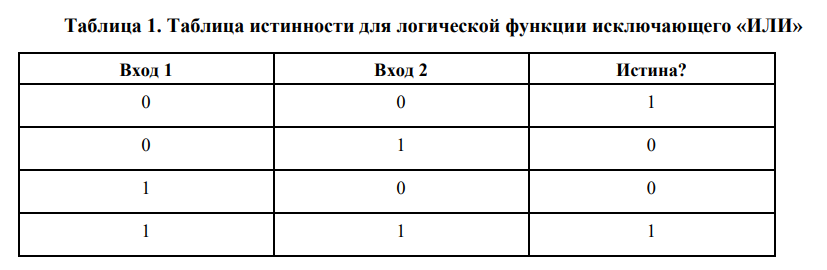

Создадим таблицу:

In [3]:
or_df = pd.DataFrame({'in1': [0, 0, 1, 1], 'in2': [0, 1, 0, 1], 'out': [1, 0, 0, 1]})
or_df

,in1,in2,out
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


Возьмем реализацию алгоритма обратного распространения ошибки из предыдущей практической работы:

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def feedforward_propagation(x, W1, W2):
    # on hidden layer
    Z1 = np.dot(x, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    return A1, A2

In [6]:
def backpropagation_propagation(y, A1, A2, W2):
    # on output layer
    L1 = A2 - y
    dW1 = L1 * A2 * (1 - A2)

    # on hidden layer
    L2 = np.dot(dW1, W2.T)
    dW2 = L2 * A1 * (1 - A1)

    return dW1, dW2

In [7]:
def update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate):
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    return W1, W2

In [8]:
def mape(y_pred, y_true):
    return ((np.abs(y_pred - y_true)).sum())/(y_true.sum())

In [9]:
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [10]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum()/(y_pred.size)

In [11]:
def backpropagation(x, y, learning_rate=0.01, epoch=10000, hidden_size=8, itsPrint=True, isMape=False):
    results = pd.DataFrame(columns=["mse", "accuracy"])

    N = x.shape[0]
    input_size = x.shape[1]
    output_size = y.shape[1]

    W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
    W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

    for eph in range(epoch+1):    
        
        A1, A2 = feedforward_propagation(x, W1, W2)
    
        mse = mean_squared_error(A2, y)
        acc = accuracy(A2, y)
        results = results._append({'mse': mse, 'accuracy': acc}, ignore_index = True)
        if itsPrint and not isMape:
            if eph%(epoch//10)==0:
                print(f"epoch {eph}: \n\tmse: {mse}, \taccuracy: {acc}")

        if itsPrint and isMape:
            if eph%(epoch//10)==0:
                print(f"epoch {eph}: \tmape: {mape(A2, y)}")
        
        
        dW1, dW2 = backpropagation_propagation(y, A1, A2, W2)
        W1, W2 = update_weight(x, A1, dW1, dW2, W1, W2, N, learning_rate)

    return W1, W2, results

Отделим целевую переменную от признакового пространства:

In [12]:
X = or_df[or_df.columns[:-1]]
y = pd.get_dummies(or_df[or_df.columns[-1]]).values

Запустим:

In [13]:
W1, W2, results = backpropagation(X, y, epoch = 10000, learning_rate=0.1, hidden_size=16)

epoch 0: 
	mse: 0.31859327536721216, 	accuracy: 0.5
epoch 1000: 
	mse: 0.24899800608062506, 	accuracy: 0.5
epoch 2000: 
	mse: 0.2471333819213633, 	accuracy: 0.5
epoch 3000: 
	mse: 0.2434871727583124, 	accuracy: 0.5
epoch 4000: 
	mse: 0.23452779655713046, 	accuracy: 0.75
epoch 5000: 
	mse: 0.21469561878068005, 	accuracy: 0.75
epoch 6000: 
	mse: 0.18306350697315693, 	accuracy: 0.75
epoch 7000: 
	mse: 0.144974668283757, 	accuracy: 1.0
epoch 8000: 
	mse: 0.1066163129269677, 	accuracy: 1.0
epoch 9000: 
	mse: 0.07390287466120685, 	accuracy: 1.0
epoch 10000: 
	mse: 0.05049992689656488, 	accuracy: 1.0


Оценим график СКО в процессе обучения:

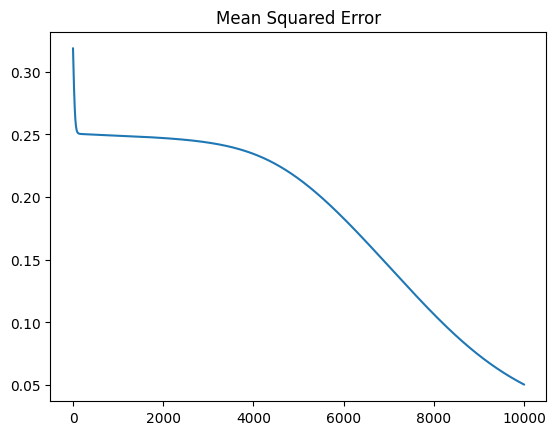

In [14]:
results.mse.plot(title="Mean Squared Error")
plt.show()

Оценим график Точности в процессе обучения:

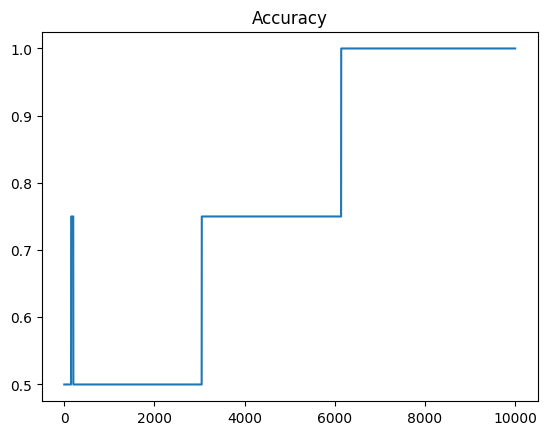

In [15]:
results.accuracy.plot(title="Accuracy")
plt.show()

Модель хорошо обучилась. Проверим на тестовых данных.

In [16]:
A1, A2 = feedforward_propagation(np.array([[1, 0], [0, 0]]) , W1, W2)
acc = accuracy(A2, pd.get_dummies([0, 1]).values)
acc

1.0

Обучим модель для четырех переменных для исключаюшего "ИЛИ":

In [17]:
xor_4_df = []
for i in range(16):
    x = i//8
    y = (i//4)%2
    z = (i//2)%2
    w = i%2
    res = x ^ y ^ z ^ w
    xor_4_df.append([x, y, z, w, res])

In [18]:
xor_4_df = pd.DataFrame(xor_4_df, columns=['x','y','z','w','res'])
xor_4_df

,x,y,z,w,res
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,0
4,0,1,0,0,1
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,0


Разделим переменные на признаки и целевые:

In [19]:
X = xor_4_df[xor_4_df.columns[:-1]]
y = pd.get_dummies(xor_4_df[xor_4_df.columns[-1]]).values

На обучающую выборку и тестовую:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Запустим:

In [21]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 40000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.29284679041240114, 	accuracy: 0.46153846153846156
epoch 4000: 
	mse: 0.2402426882567636, 	accuracy: 0.5384615384615384
epoch 8000: 
	mse: 0.23882318109277392, 	accuracy: 0.5384615384615384
epoch 12000: 
	mse: 0.23478335382046842, 	accuracy: 0.6923076923076923
epoch 16000: 
	mse: 0.22648155292776806, 	accuracy: 0.6923076923076923
epoch 20000: 
	mse: 0.21390710347505115, 	accuracy: 0.6153846153846154
epoch 24000: 
	mse: 0.1879208383785596, 	accuracy: 0.8461538461538461
epoch 28000: 
	mse: 0.1498456360030992, 	accuracy: 0.7692307692307693
epoch 32000: 
	mse: 0.10100206192668391, 	accuracy: 0.9230769230769231
epoch 36000: 
	mse: 0.04468716598335769, 	accuracy: 1.0
epoch 40000: 
	mse: 0.01897231482532225, 	accuracy: 1.0


Оценим график СКО в процессе обучения:

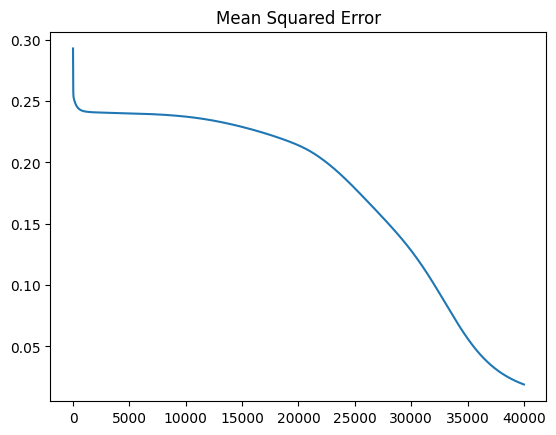

In [22]:
results.mse.plot(title="Mean Squared Error")
plt.show()

Оценим график Точности в процессе обучения:

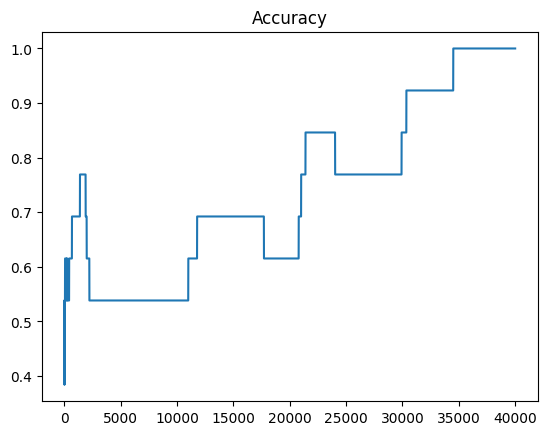

In [23]:
results.accuracy.plot(title="Accuracy")
plt.show()

Модель имеет высокую точность, но не идеальную как с предыдущим примером. Проверим на тестовых данных:

In [24]:
A1, A2 = feedforward_propagation(X_test , W1, W2)
acc = accuracy(A2, y_test)
acc

0.3333333333333333

Модель не смогла найти хорошую закономерность для правильной классификации.

## ОПРЕДЕЛЕНИЕ НАПРАВЛЕНИЯ ДВОИЧНОГО СДВИГА

**Цель** – построение, обучение и тестирование нейронной сети, предназначенной для определения направления сдвига двоичного кода.

Задание:
1. Создать и обучить нейронную сеть для определения направление
циклического сдвига четырехпозиционного двоичного кода.
2. Оптимизация структуры нейронной сети по критерию минимума
ошибки обучения (на основе количества нейронов в скрытом слое и по
количеству эпох(итераций)).
3. Проверить работоспособность нейронной сети.

Построим таблицу сдвигов с классами 1 и 0, где 1 - сдвиг влево, 0 - сдвиг вправо:

In [25]:
sdvg_df = []
for n in [1, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14]:
    bin_n = '0'*(4-len(bin(n)[2:]))+str(bin(n)[2:]) if len(bin(n)[2:]) < 4 else bin(n)[2:]
    bin_l = bin_n[1:] + bin_n[0]
    bin_r = bin_n[-1] + bin_n[:-1]
    print(n, '\t', bin_n, bin_l, bin_r)
    sdvg_df.append([int(bin_n, 2), int(bin_l, 2), 1])
    sdvg_df.append([int(bin_n, 2), int(bin_r, 2), 0])

1 	 0001 0010 1000
2 	 0010 0100 0001
3 	 0011 0110 1001
4 	 0100 1000 0010
6 	 0110 1100 0011
7 	 0111 1110 1011
8 	 1000 0001 0100
9 	 1001 0011 1100
11 	 1011 0111 1101
13 	 1101 1011 1110
14 	 1110 1101 0111


In [26]:
sdvg_df = pd.DataFrame(sdvg_df, columns=['n','shift','type'])

Разделим переменные на признаковые и на целевые:

In [126]:
X = sdvg_df[sdvg_df.columns[:-1]]
y = pd.get_dummies(sdvg_df[sdvg_df.columns[-1]]).values

Разобьем выборку на обучающую и тестовую:

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Сымитируем grid-search для разного количества эпох и разного количества скрытых слоев, оставляя при этом параметр скорости обучения статичным и равным 0.1:

In [29]:
results_diff = pd.DataFrame(columns=["epoch", "hidden_size", "mse", "accuracy"])
for epoch in [x/4*10**4 for x in range(1, 11)]:
    for hidden_size in [2**x for x in range(1, 11)]:
        _, _, results = backpropagation(X_train, y_train, epoch=int(epoch), learning_rate=0.1, hidden_size=int(hidden_size), itsPrint=False)
        results_diff = results_diff._append({'mse': results.mse.iloc[-1], 
                                             'accuracy': results.accuracy.iloc[-1],
                                             'hidden_size': int(hidden_size),
                                             'epoch': int(epoch)}, ignore_index = True)

Посмотрим результаты: 

In [30]:
results_diff

,epoch,hidden_size,mse,accuracy
0,2500.0,2.0,0.249050,0.500000
1,2500.0,4.0,0.246060,0.611111
2,2500.0,8.0,0.193560,0.777778
3,2500.0,16.0,0.159058,0.888889
4,2500.0,32.0,0.136770,0.944444
...,...,...,...,...
95,25000.0,64.0,0.003386,1.000000
96,25000.0,128.0,0.002807,1.000000
97,25000.0,256.0,0.001747,1.000000
98,25000.0,512.0,0.250891,0.500000


Построим график зависимости ошибки обучения от количества слоев для количества итераций равного 20000:

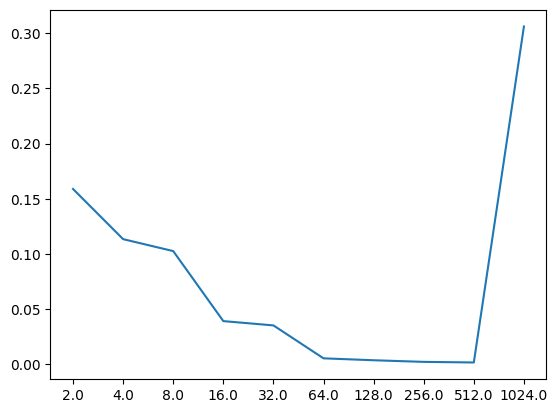

In [31]:
plt.plot(range(10), results_diff.loc[(results_diff['epoch'] == 20000)].mse)
plt.xticks(range(10), results_diff.loc[(results_diff['epoch'] == 20000)].hidden_size, fontdict={'size': 10})
plt.show()

Минимальное MSE:

In [32]:
results_diff.loc[(results_diff['epoch'] == 20000)].mse.min()

0.00182183279015122

Для самой качественной модели требуется больше всего ресурсов - для модели с $MSE \approx 0.002$ требуется 256 слоя и 20000 итераций.

Для лучшего результата проведем обучение ещё раз, для оценки графиков изменения точности и качества:

In [128]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 20000, learning_rate=0.1, hidden_size=256)

epoch 0: 
	mse: 0.44651851370648754, 	accuracy: 0.5
epoch 2000: 
	mse: 0.06256561064437359, 	accuracy: 1.0
epoch 4000: 
	mse: 0.02962976069423431, 	accuracy: 1.0
epoch 6000: 
	mse: 0.01627418830684857, 	accuracy: 1.0
epoch 8000: 
	mse: 0.010330771099856745, 	accuracy: 1.0
epoch 10000: 
	mse: 0.007249164204293034, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0054582698659395535, 	accuracy: 1.0
epoch 14000: 
	mse: 0.0043157244913269764, 	accuracy: 1.0
epoch 16000: 
	mse: 0.0035365677342732546, 	accuracy: 1.0
epoch 18000: 
	mse: 0.002976890102318529, 	accuracy: 1.0
epoch 20000: 
	mse: 0.0025579307470330946, 	accuracy: 1.0


Построим график ошибок:

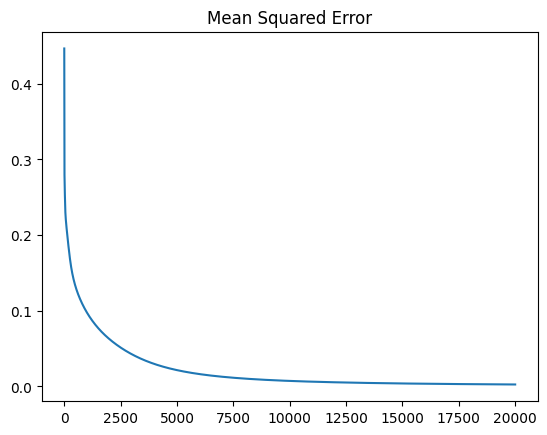

In [129]:
results.mse.plot(title="Mean Squared Error")
plt.show()

График точности модели:

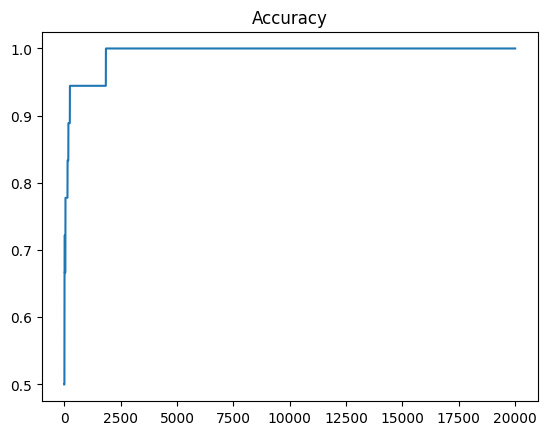

In [130]:
results.accuracy.plot(title="Accuracy")
plt.show()

Обучим на тестовой выборке:

In [131]:
A1, A2 = feedforward_propagation(X_test , W1, W2)
acc = accuracy(A2, y_test)
acc

1.0

Добились идеальных результатов.

## РАСПОЗНАВАНИЕ СИМВОЛОВ

**Цель** – разработать и исследовать нейронную сеть обратного распространения, предназначенную для распознавания образов.

Задание:
1. Построить и обучить нейронную сеть, которая могла бы решать задачу
распознавания символов: X, Y, I, C.
2. Найти оптимальную структуру НС, минимизировав ошибку обучения в
зависимости от количества нейронов в скрытом слое
3. Произвести тестирование нейронной сети при добавлении шума.
4. Построить нейронную сеть в соответствии с заданиями и выполнить
задания 2-3.

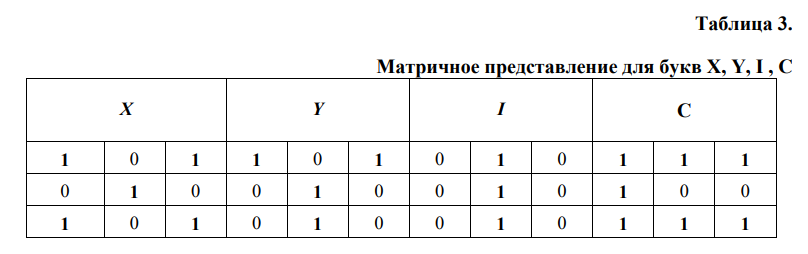

Разобьем каждую координату матричного представления символа по отдельным колонкам по аналогии работы энкодера One-Hot.

In [145]:
symb_3_3 = [[1, 0, 1, 0, 1, 0, 1, 0, 1, 'x'],
            [1, 0, 1, 0, 1, 0, 0, 1, 0, 'y'],
            [0, 1, 0, 0, 1, 0,  0, 1, 0, 'i'],
            [1, 1, 1, 1, 0, 0, 1, 1, 1, 'c']]

In [146]:
symb_3_3_df = pd.DataFrame(symb_3_3, columns=[f'cord{x}' for x in range(9)]+['symb'])
symb_3_3_df

,cord0,cord1,cord2,cord3,cord4,cord5,cord6,cord7,cord8,symb
0,1,0,1,0,1,0,1,0,1,x
1,1,0,1,0,1,0,0,1,0,y
2,0,1,0,0,1,0,0,1,0,i
3,1,1,1,1,0,0,1,1,1,c


In [147]:
X = symb_3_3_df[symb_3_3_df.columns[:-1]]
y = pd.get_dummies(symb_3_3_df[symb_3_3_df.columns[-1]]).values

С помощью One-Hot-encoding это выглядит следующим образом:

In [154]:
pd.DataFrame(y, columns=symb_3_3_df[symb_3_3_df.columns[-1]][::-1])

symb,c,i,y,x
0,False,False,True,False
1,False,False,False,True
2,False,True,False,False
3,True,False,False,False


Обучим:

In [155]:
W1, W2, results = backpropagation(X, y, epoch = 10000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.31199077402326736, 	accuracy: 0.25
epoch 1000: 
	mse: 0.018062128777158612, 	accuracy: 1.0
epoch 2000: 
	mse: 0.005889996807745824, 	accuracy: 1.0
epoch 3000: 
	mse: 0.00321154782330495, 	accuracy: 1.0
epoch 4000: 
	mse: 0.002135578569218725, 	accuracy: 1.0
epoch 5000: 
	mse: 0.0015737110837891386, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0012341710192324037, 	accuracy: 1.0
epoch 7000: 
	mse: 0.0010089988984428996, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0008497557456661556, 	accuracy: 1.0
epoch 9000: 
	mse: 0.0007317087376083307, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0006409978026436711, 	accuracy: 1.0


График ошибки модели:

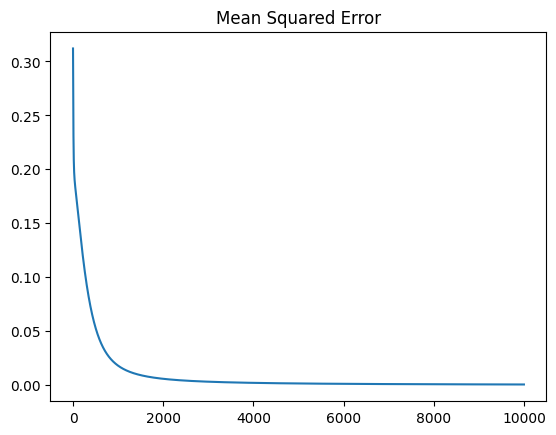

In [156]:
results.mse.plot(title="Mean Squared Error")
plt.show()

График точности модели:

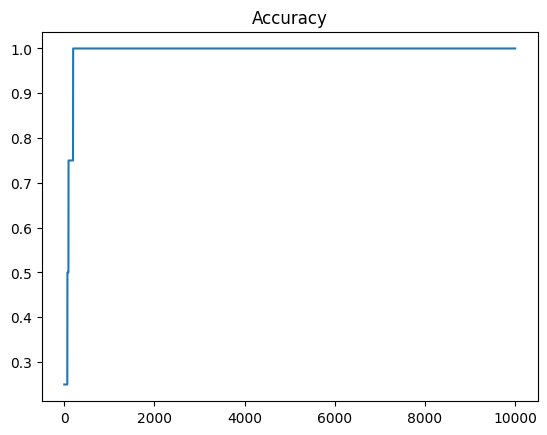

In [157]:
results.accuracy.plot(title="Accuracy")
plt.show()

Протестируем для символа 'C' с не до конца доведенной дугой в виде:
<br><div align='center'>
    111<br>
    100<br>
    110<br>
</div>

In [158]:
A1, A2 = feedforward_propagation([1, 1, 1, 1, 0, 0, 1, 1, 0], W1, W2)

Посмотрим, чем соответствует данная матрица:

In [159]:
pd.DataFrame([A2], columns=symb_3_3_df[symb_3_3_df.columns[-1]][::-1])

symb,c,i,y,x
0,0.940165,0.034766,0.004594,0.074096


Больший вес относит к символу 'C'.

### Дополнительное задание 7.1

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию цифр, заданных пиксельной матрицей размером 7х5, используя 4 битный код на выходе. Произвести тестирование НС при добавлении шума./

Опишем цифры 0, 1, 2, 3 в виде матрицы 7x5:
<br><div align='center'>
<pre>11111  00100   01110   01110</pre>
<pre>10001  01100   11011   10001</pre>
<pre>10001  10100   10001   00011</pre>
<pre>10001  00100   00010   00111</pre>
<pre>10001  00100   00100   00011</pre>
<pre>10001  00100   01000   10001</pre>
<pre>11111  11111   11111   01110</pre>
</div>

In [132]:
symb_7_5 = [[1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1, 1,0,0,0,1, 1,0,0,0,1, 1,0,0,0,1, 1,1,1,1,1, '0'],
            [0,0,1,0,0, 0,1,1,0,0, 1,0,1,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,0,0, 1,1,1,1,1, '1'],
            [0,1,1,1,0, 1,1,0,1,1, 1,0,0,0,1, 0,0,0,1,0, 0,0,1,0,0, 0,1,0,0,0, 1,1,1,1,1, '2'],
            [0,1,1,1,0, 1,0,0,0,1, 0,0,0,1,1, 0,0,1,1,1, 0,0,0,1,1, 1,0,0,0,1, 0,1,1,1,0, '3']]

In [133]:
symb_7_5_df = pd.DataFrame(symb_7_5, columns=[f'cord{x}' for x in range(len(symb_7_5[0])-1)]+['symb'])

In [141]:
X = symb_7_5_df[symb_7_5_df.columns[:-1]]
y = pd.get_dummies(symb_7_5_df[symb_7_5_df.columns[-1]]).values

In [142]:
pd.DataFrame(y, columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


In [136]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.2339428100771931, 	accuracy: 0.25
epoch 2000: 
	mse: 0.002322953603060186, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0010045797286331061, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0006269262093581803, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0004515436854250973, 	accuracy: 1.0
epoch 10000: 
	mse: 0.00035113310790078065, 	accuracy: 1.0
epoch 12000: 
	mse: 0.00028639985227796544, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00024133487213347143, 	accuracy: 1.0
epoch 16000: 
	mse: 0.00020822559306124265, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00018290974783376354, 	accuracy: 1.0
epoch 20000: 
	mse: 0.0001629481865460778, 	accuracy: 1.0


Протестируем для символа '0' в зашумленном виде:
<br><div align='center'>
    01110<br>
    10011<br>
    10001<br>
    10101<br>
    10001<br>
    11001<br>
    01110<br>
</div>

In [143]:
A1, A2 = feedforward_propagation([0,1,1,1,0, 1,0,0,1,1, 1,0,0,0,1, 1,0,1,0,1, 1,0,0,0,1, 1,1,0,0,1, 0,1,1,1,0], W1, W2)

In [144]:
pd.DataFrame([A2], columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3
0,0.324866,0.015937,0.05717,0.182769


Самый большой вес принадлежит 0.

### Дополнительное задание 7.2

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию цифр, заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

Опишем цифры в виде матрицы 7x5:
<br><div align='center'>
<pre>11111  00100   01110   01110   10001   11111   00111   11111   11111   11111</pre>
<pre>10001  01100   11011   10001   10001   10000   01100   00011   10001   10001</pre>
<pre>10001  10100   10001   00011   10001   10000   11000   00110   10001   10001</pre>
<pre>10001  00100   00010   00111   11111   11110   11111   00110   01110   11111</pre>
<pre>10001  00100   00100   00011   00001   00011   10001   01100   10001   00011</pre>
<pre>10001  00100   01000   10001   00001   00011   10001   01100   10001   00110</pre>
<pre>11111  11111   11111   01110   00001   11110   11111   11000   11111   11100</pre>
</div>

In [53]:
symb_7_5 = [[1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, '0'],
            [0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1, '1'],
            [0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1, '2'],
            [0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0, '3'],
            [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1, '4'],
            [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0, '5'],
            [0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, '6'],
            [1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0, '7'],
            [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, '8'],
            [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0, '9']]

In [54]:
symb_7_5_df = pd.DataFrame(symb_7_5, columns=[f'cord{x}' for x in range(len(symb_7_5[0])-1)]+['symb'])

In [55]:
X = symb_7_5_df[symb_7_5_df.columns[:-1]]
y = pd.get_dummies(symb_7_5_df[symb_7_5_df.columns[-1]]).values

In [56]:
pd.DataFrame(y, columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True


In [57]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.415602767634232, 	accuracy: 0.1
epoch 2000: 
	mse: 0.006584885609653825, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0023283081467166573, 	accuracy: 1.0
epoch 6000: 
	mse: 0.001347011314413853, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0009308485064556234, 	accuracy: 1.0
epoch 10000: 
	mse: 0.000704907929525767, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0005643405409235968, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00046896942776090446, 	accuracy: 1.0
epoch 16000: 
	mse: 0.0004002598039309553, 	accuracy: 1.0
epoch 18000: 
	mse: 0.0003485306691683417, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00030825267563996153, 	accuracy: 1.0


Протестируем для символа '5' в зашумленном виде:
<br><div align='center'>
    00111<br> 
    10000  
    10000<br>
    01110<br>
    00011<br>
    00011<br>
    11110<br>
</div>

In [58]:
A1, A2 = feedforward_propagation([0,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0], W1, W2)

In [59]:
pd.DataFrame([A2], columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3,4,5,6,7,8,9
0,0.000801,0.007409,0.049918,0.028747,0.022408,0.458644,0.057823,0.01024,0.136716,0.022034


Больший вес присвоил цифре 5.

### Дополнительное задание 7.3

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию четности цифр, заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

In [60]:
symbch_7_5  = [[1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'chet'],
               [0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1, 'nechet'],
               [0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1, 'chet'],
               [0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0, 'nechet'],
               [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1, 'chet'],
               [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0, 'nechet'],
               [0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'chet'],
               [1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0, 'nechet'],
               [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'chet'],
               [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0, 'nechet']]

In [61]:
symbch_7_5_df = pd.DataFrame(symbch_7_5, columns=[f'cord{x}' for x in range(len(symbch_7_5[0])-1)]+['symb'])

In [62]:
X = symbch_7_5_df[symbch_7_5_df.columns[:-1]]
y = pd.get_dummies(symbch_7_5_df[symbch_7_5_df.columns[-1]]).values

In [63]:
pd.DataFrame(y, columns=['chet', 'nechet'])

,chet,nechet
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,False,True
6,True,False
7,False,True
8,True,False
9,False,True


In [64]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.2632458105514123, 	accuracy: 0.6
epoch 2000: 
	mse: 0.0033274409041387275, 	accuracy: 1.0
epoch 4000: 
	mse: 0.001291293263141433, 	accuracy: 1.0
epoch 6000: 
	mse: 0.000765682774598688, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0005343630702747773, 	accuracy: 1.0
epoch 10000: 
	mse: 0.00040645933450816327, 	accuracy: 1.0
epoch 12000: 
	mse: 0.00032604548996588553, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00027113357468736465, 	accuracy: 1.0
epoch 16000: 
	mse: 0.00023140912149980348, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00020142161069760367, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00017803152299370131, 	accuracy: 1.0


Протестируем для символа четного числа в зашумленном виде:
<br><div align='center'>
11111<br> 
11001  
00001<br>
00111<br>
01100<br>
11001<br>
11111<br>
</div>

In [65]:
A1, A2 = feedforward_propagation([1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1], W1, W2)

In [66]:
pd.DataFrame([A2], columns=['chet', 'nechet'])

,chet,nechet
0,0.905245,0.069945


Зашумленную двойку идентифицировал как четную цифру.

### Дополнительное задание 7.4

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию нечетности цифр, заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

Воспользуемся моделью из предыдущего задания и протестируем для единицы:
<br><div align='center'>
00000<br> 
01100  
10100<br>
00100<br>
00100<br>
00100<br>
11100<br>
</div>

In [67]:
A1, A2 = feedforward_propagation([0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0], W1, W2)

In [68]:
pd.DataFrame([A2], columns=['chet', 'nechet'])

,chet,nechet
0,0.003624,0.993063


Больший вес принадлежит нечетному числу.

### Дополнительное задание 7.5

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию простых чисел (от 0 до 9), заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

Воспользуемся моделью из задания 7.2:


In [69]:
X = symb_7_5_df[symb_7_5_df.columns[:-1]]
y = pd.get_dummies(symb_7_5_df[symb_7_5_df.columns[-1]]).values

In [70]:
pd.DataFrame(y, columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True


In [71]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.26069227607188955, 	accuracy: 0.1
epoch 2000: 
	mse: 0.016214055376170846, 	accuracy: 0.9
epoch 4000: 
	mse: 0.004066093337930257, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0015004696698969406, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0009464888463256539, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0006901297867152565, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0005413246373697947, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00044418333654123684, 	accuracy: 1.0
epoch 16000: 
	mse: 0.0003758857097535378, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00032532064682440706, 	accuracy: 1.0
epoch 20000: 
	mse: 0.0002864243773961508, 	accuracy: 1.0


Протестируем для восьмерки:
<br><div align='center'>
01110<br> 
10001  
10001<br>
01010<br>
10001<br>
10001<br>
01110<br>
</div>

In [72]:
A1, A2 = feedforward_propagation([0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0], W1, W2)

In [73]:
pd.DataFrame([A2], columns=symb_7_5_df[symb_7_5_df.columns[-1]])

symb,0,1,2,3,4,5,6,7,8,9
0,0.043152,0.003981,0.087035,0.214743,0.006817,0.01197,0.014626,0.001148,0.454785,0.009705


Алгоритм идентифицирует зашумленную восьмерку.

### Дополнительное задание 7.6

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию числе, делящихся на 3 без остатка (от 0 до 9), заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

In [74]:
symbtree_7_5  = [[1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'div'],
                 [0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1, 'nodiv'],
                 [0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1, 'nodiv'],
                 [0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0, 'div'],
                 [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1, 'nodiv'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0, 'nodiv'],
                 [0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'div'],
                 [1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0, 'nodiv'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'nodiv'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0, 'div']]

In [75]:
symbtree_7_5_df = pd.DataFrame(symbtree_7_5, columns=[f'cord{x}' for x in range(len(symbtree_7_5[0])-1)]+['symb'])

In [76]:
X = symbtree_7_5_df[symbtree_7_5_df.columns[:-1]]
y = pd.get_dummies(symbtree_7_5_df[symbtree_7_5_df.columns[-1]]).values

In [77]:
pd.DataFrame(y, columns=['div', 'nodiv'])

,div,nodiv
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True
5,False,True
6,True,False
7,False,True
8,False,True
9,True,False


In [78]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.31970504899200397, 	accuracy: 0.6
epoch 2000: 
	mse: 0.007034292336027539, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0022417540105242736, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0012426683686052697, 	accuracy: 1.0
epoch 8000: 
	mse: 0.000837919765003739, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0006239945528722145, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0004933200291643588, 	accuracy: 1.0
epoch 14000: 
	mse: 0.0004058723276491575, 	accuracy: 1.0
epoch 16000: 
	mse: 0.0003435570385153812, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00029706490817670977, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00026114221508925317, 	accuracy: 1.0


Протестируем для символа "два" в зашумленном виде:
<br><div align='center'>
11111<br> 
11001  
00001<br>
00111<br>
01100<br>
11001<br>
11111<br>
</div>

In [79]:
A1, A2 = feedforward_propagation([1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1], W1, W2)

In [80]:
pd.DataFrame([A2], columns=['div', 'nodiv'])

,div,nodiv
0,0.023477,0.971099


Двойка действительно не делится на три без остатка.

### Дополнительное задание 7.7

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию простых чисел (от 0 до 9), заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума.

In [81]:
symbprime_7_5 = [[1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'noprime'],
                 [0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1, 'prime'],
                 [0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1, 'prime'],
                 [0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0, 'prime'],
                 [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1, 'noprime'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0, 'prime'],
                 [0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'noprime'],
                 [1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0, 'prime'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'noprime'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0, 'noprime']]

In [82]:
symbprime_7_5_df = pd.DataFrame(symbprime_7_5, columns=[f'cord{x}' for x in range(len(symbprime_7_5[0])-1)]+['symb'])

In [83]:
X = symbprime_7_5_df[symbprime_7_5_df.columns[:-1]]
y = pd.get_dummies(symbprime_7_5_df[symbprime_7_5_df.columns[-1]]).values

In [84]:
pd.DataFrame(y, columns=['noprime', 'prime'])

,noprime,prime
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
5,False,True
6,True,False
7,False,True
8,True,False
9,True,False


In [85]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.3872494720206785, 	accuracy: 0.5
epoch 2000: 
	mse: 0.005091882959672852, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0017171768948664276, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0009723895450561815, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0006631947835385157, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0004974794159399969, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0003953192941364071, 	accuracy: 1.0
epoch 14000: 
	mse: 0.0003265010651226147, 	accuracy: 1.0
epoch 16000: 
	mse: 0.00027721467295629135, 	accuracy: 1.0
epoch 18000: 
	mse: 0.0002402968980703983, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00021167938632265783, 	accuracy: 1.0


Протестируем для символа "пять" в зашумленном виде:
<br><div align='center'>
01111<br> 
10000  
10000<br>
01111<br>
01001<br>
00001<br>
11111<br>
</div>

In [86]:
A1, A2 = feedforward_propagation([0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1], W1, W2)

In [87]:
pd.DataFrame([A2], columns=['noprime', 'prime'])

,noprime,prime
0,0.08877,0.914785


Пятерка является простым числом.

### Дополнительное задание 7.8

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию английских букв, заданных пиксельной матрицей размером 7х5. Произвести тестирование НС при добавлении шума. Пример матрицы:

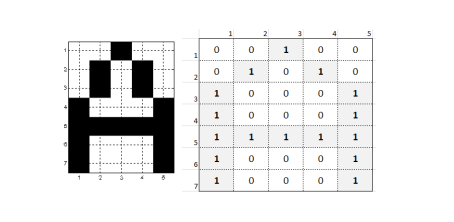

Опишем латинский алфавит от A до H в виде матрицы 7x5:
<br><div align='center'>
<pre>00100  11111   11111   11100   11111   11111   11111   10001</pre>
<pre>01010  10001   10000   10010   10000   10000   10000   10001</pre>
<pre>10001  10001   10000   10001   10000   10000   10000   10001</pre>
<pre>10001  11111   10000   10001   11111   11111   10111   11111</pre>
<pre>11111  10001   10000   10001   10000   10000   10101   10001</pre>
<pre>10001  10001   10000   10010   10000   10000   10001   10001</pre>
<pre>10001  11111   11111   11100   11111   10000   11111   10001</pre>
</div>

In [88]:
symbalphb_7_5 = [[0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1, 'a'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'b'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1, 'c'],
                 [1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,1,0,0, 'd'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1, 'e'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0, 'f'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,1,1,1, 'g'],
                 [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1, 'h']]

In [89]:
symbalphb_7_5_df = pd.DataFrame(symbalphb_7_5, columns=[f'cord{x}' for x in range(len(symbalphb_7_5[0])-1)]+['symb'])

In [90]:
X = symbalphb_7_5_df[symbalphb_7_5_df.columns[:-1]]
y = pd.get_dummies(symbalphb_7_5_df[symbalphb_7_5_df.columns[-1]]).values

In [91]:
pd.DataFrame(y, columns=symbalphb_7_5_df[symbalphb_7_5_df.columns[-1]])

symb,a,b,c,d,e,f,g,h
0,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False
5,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,True


In [92]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.1902748622441316, 	accuracy: 0.0
epoch 2000: 
	mse: 0.011728888803823148, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0036724333155040666, 	accuracy: 1.0
epoch 6000: 
	mse: 0.001974493139831032, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0013115273194043166, 	accuracy: 1.0
epoch 10000: 
	mse: 0.000968769759316381, 	accuracy: 1.0
epoch 12000: 
	mse: 0.0007622146179425087, 	accuracy: 1.0
epoch 14000: 
	mse: 0.0006252058060895446, 	accuracy: 1.0
epoch 16000: 
	mse: 0.0005281663756547764, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00045608245255457955, 	accuracy: 1.0
epoch 20000: 
	mse: 0.0004005650473100904, 	accuracy: 1.0


Протестируем для символа "F" в зашумленном виде:
<br><div align='center'>
11111<br> 
10001  
10000<br>
11011<br>
10000<br>
10001<br>
10000<br>
</div>

In [93]:
A1, A2 = feedforward_propagation([1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0], W1, W2)

In [94]:
pd.DataFrame([A2], columns=symbalphb_7_5_df[symbalphb_7_5_df.columns[-1]])

symb,a,b,c,d,e,f,g,h
0,0.008538,0.009464,0.002205,0.007384,0.000429,0.697579,0.007335,0.070341


Сеть смогла распознать символ "F" в зашумленном виде, присвоив ей наибольший вес.

### Дополнительное задание 7.9

Создать нейронную сеть со структурой «многослойный персептрон», и обучить ее распознаванию английских букв, заданных пиксельной матрицей размером 7х5, используя 4 битный код на выходе. Произвести тестирование НС при добавлении шума.

Возьмем матрицу из предыдущего задания и сократим до 4 возможных вариантов:

In [95]:
symbalcut_7_5 = [[0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1, 'a'],
                 [1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1, 'b'],
                 [1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1, 'c'],
                 [1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,1,0,0, 'd']]

In [96]:
symbalcut_7_5_df = pd.DataFrame(symbalcut_7_5, columns=[f'cord{x}' for x in range(len(symbalcut_7_5[0])-1)]+['symb'])

In [97]:
X = symbalcut_7_5_df[symbalcut_7_5_df.columns[:-1]]
y = pd.get_dummies(symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]]).values

In [98]:
pd.DataFrame(y, columns=symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]])

symb,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


In [99]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.31997981066580194, 	accuracy: 0.25
epoch 2000: 
	mse: 0.0027162753452562344, 	accuracy: 1.0
epoch 4000: 
	mse: 0.001177394057539834, 	accuracy: 1.0
epoch 6000: 
	mse: 0.0007319492784073104, 	accuracy: 1.0
epoch 8000: 
	mse: 0.0005254562967914483, 	accuracy: 1.0
epoch 10000: 
	mse: 0.0004076142036146639, 	accuracy: 1.0
epoch 12000: 
	mse: 0.00033186246812215626, 	accuracy: 1.0
epoch 14000: 
	mse: 0.00027924977366846173, 	accuracy: 1.0
epoch 16000: 
	mse: 0.00024066643574056898, 	accuracy: 1.0
epoch 18000: 
	mse: 0.00021120821055609968, 	accuracy: 1.0
epoch 20000: 
	mse: 0.00018800771324937473, 	accuracy: 1.0


Протестируем для символа "D" в зашумленном виде:
<br><div align='center'>
11100<br> 
00001  
10001<br>
10011<br>
10001<br>
10011<br>
11100<br>
</div>

In [100]:
A1, A2 = feedforward_propagation([1,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1,0,0], W1, W2)

In [101]:
pd.DataFrame([A2], columns=symbalcut_7_5_df[symbalcut_7_5_df.columns[-1]])

symb,a,b,c,d
0,0.033478,0.498142,0.001526,0.8002


Символу "D" был назначен наибольший вес.

## ИСКУССТВЕННЫЙ НОС

**Цель** – разработать и исследовать ИНС обратного распространения для искусственного носа, предназначенного для химического анализа воздушной среды.

Задание
1. Исследовать и проанализировать имеющиеся экспериментальные данные
(табл. 4.1), и определить количество вводов и выводов, требуемых для
полносвязанной ИНС обратного распространения.
2. Создать и обучить нейронную сеть, которая будет способна указывать
наличие определенных примесей в воздухе при анализе показаний
химических датчиков.
3. Обучить нейронную сеть, расшив количество представительских выборок
(обучающих пар), применяемых для обучения ИНС (табл. 4.2).
4. Определить оптимальную структуру нейронной сети с точки зрения
минимизации среднеквадратической ошибки обучения.

Топология нейронной сети прототипа искусственного носа:

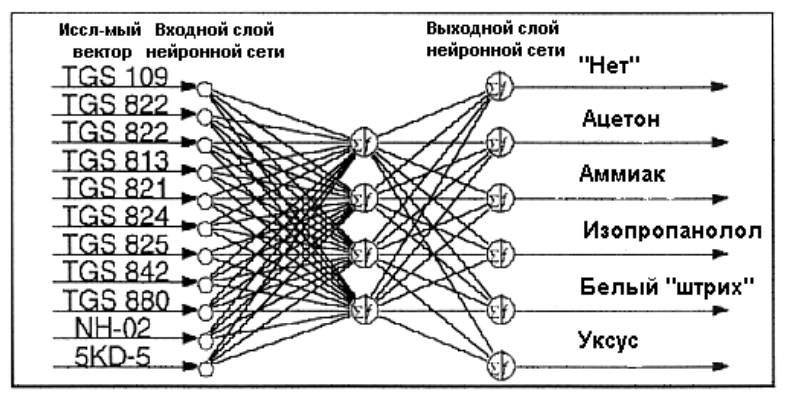

В соответствии с таблицей 4, сформируем первый вектор:

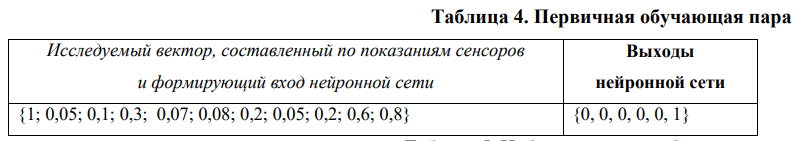

In [102]:
chemistry = [[1, 0.05, 0.1, 0.3, 0.07, 0.08, 0.2, 0.05, 0.2, 0.6, 0.8, 'no']]

Сформируем датафрейм:

In [103]:
chemistry_df = pd.DataFrame(chemistry, columns=[f'attr{x}' for x in range(len(chemistry[0])-1)]+['mixture'])
chemistry_df

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,mixture
0,1,0.05,0.1,0.3,0.07,0.08,0.2,0.05,0.2,0.6,0.8,no


Разделим переменные:

In [104]:
X = chemistry_df[chemistry_df.columns[:-1]]
y = pd.get_dummies(chemistry_df[chemistry_df.columns[-1]]).values

Отобразим целевую колонку с возможными результатами:

In [105]:
pd.DataFrame(y, columns=chemistry_df[chemistry_df.columns[-1]])

mixture,no
0,True


Обучим модель:

In [106]:
W1, W2, results = backpropagation(X, y, epoch = 20000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.1478366823170328, 	accuracy: 1.0
epoch 2000: 
	mse: 0.00025637086751515266, 	accuracy: 1.0
epoch 4000: 
	mse: 0.0001252811786602877, 	accuracy: 1.0
epoch 6000: 
	mse: 8.260159555511428e-05, 	accuracy: 1.0
epoch 8000: 
	mse: 6.151781096950595e-05, 	accuracy: 1.0
epoch 10000: 
	mse: 4.896687302685896e-05, 	accuracy: 1.0
epoch 12000: 
	mse: 4.06475397570892e-05, 	accuracy: 1.0
epoch 14000: 
	mse: 3.473166061620761e-05, 	accuracy: 1.0
epoch 16000: 
	mse: 3.0310812965823193e-05, 	accuracy: 1.0
epoch 18000: 
	mse: 2.6882788633619876e-05, 	accuracy: 1.0
epoch 20000: 
	mse: 2.414747561555951e-05, 	accuracy: 1.0


Построим для нее график ошибки:

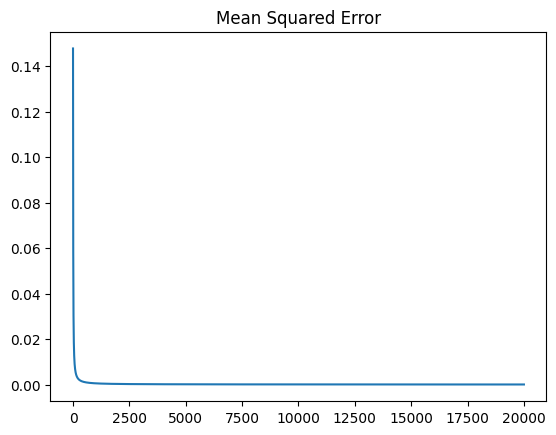

In [107]:
results.mse.plot(title="Mean Squared Error")
plt.show()

Обогатим датасет данными из таблицы 5:

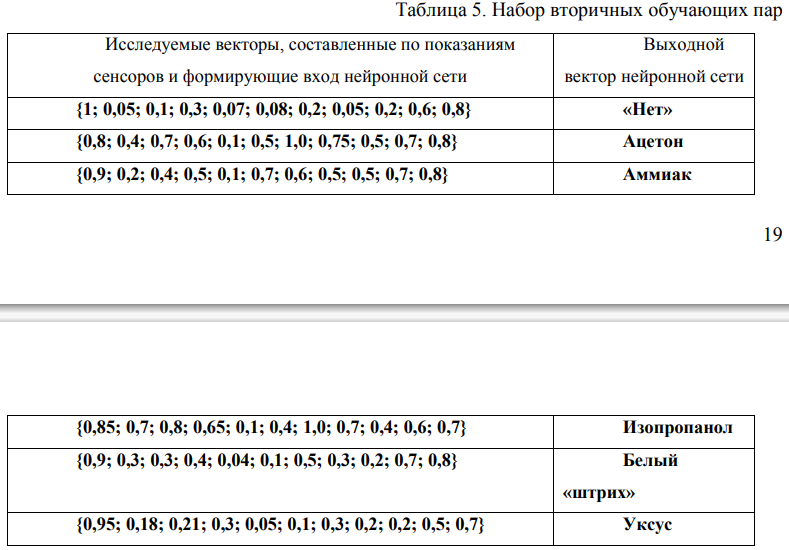

In [108]:
chemistry = [[1, 0.05, 0.1, 0.3, 0.07, 0.08, 0.2, 0.05, 0.2, 0.6, 0.8, 'no'],
             [0.8, 0.4, 0.7, 0.6, 0.1, 0.5, 1, 0.75, 0.5, 0.7, 0.8, 'acetone'],
             [0.9, 0.2, 0.4, 0.5, 0.1, 0.7, 0.6, 0.5, 0.5, 0.7, 0.8, 'ammonia'],
             [0.85, 0.7, 0.8, 0.65, 0.1, 0.4, 1, 0.7, 0.4, 0.6, 0.7, 'isopropanol'],
             [0.9, 0.3, 0.3, 0.4, 0.04, 0.1, 0.5, 0.3, 0.2, 0.7, 0.8, 'white_stroke'],
             [0.95, 0.18, 0.21, 0.3, 0.05, 0.1, 0.3, 0.2, 0.2, 0.5, 0.7, 'vinegar']]

Формируем датафрейм:

In [109]:
chemistry_df = pd.DataFrame(chemistry, columns=[f'attr{x}' for x in range(len(chemistry[0])-1)]+['mixture'])
chemistry_df = chemistry_df.sort_values('mixture')
chemistry_df

,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,mixture
1,0.80,0.40,0.70,0.60,0.10,0.50,1.0,0.75,0.5,0.7,0.8,acetone
2,0.90,0.20,0.40,0.50,0.10,0.70,0.6,0.50,0.5,0.7,0.8,ammonia
3,0.85,0.70,0.80,0.65,0.10,0.40,1.0,0.70,0.4,0.6,0.7,isopropanol
0,1.00,0.05,0.10,0.30,0.07,0.08,0.2,0.05,0.2,0.6,0.8,no
5,0.95,0.18,0.21,0.30,0.05,0.10,0.3,0.20,0.2,0.5,0.7,vinegar
4,0.90,0.30,0.30,0.40,0.04,0.10,0.5,0.30,0.2,0.7,0.8,white_stroke


Разделяем переменные:

In [110]:
X = chemistry_df[chemistry_df.columns[:-1]]
y = pd.get_dummies(chemistry_df[chemistry_df.columns[-1]]).values

Отобразим целевую колонку с возможными результатами:

In [111]:
pd.DataFrame(y, columns=chemistry_df[chemistry_df.columns[-1]])

mixture,acetone,ammonia,isopropanol,no,vinegar,white_stroke
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,True,False
5,False,False,False,False,False,True


Обучаем:

In [112]:
W1, W2, results = backpropagation(X, y, epoch = 30000, learning_rate=0.1, hidden_size=32)

epoch 0: 
	mse: 0.4330195353154621, 	accuracy: 0.16666666666666666
epoch 3000: 
	mse: 0.08046018994583265, 	accuracy: 0.8333333333333334
epoch 6000: 
	mse: 0.04923506384924154, 	accuracy: 1.0
epoch 9000: 
	mse: 0.03052405468339446, 	accuracy: 1.0
epoch 12000: 
	mse: 0.019418265629019892, 	accuracy: 1.0
epoch 15000: 
	mse: 0.012864615410043632, 	accuracy: 1.0
epoch 18000: 
	mse: 0.008810680624902104, 	accuracy: 1.0
epoch 21000: 
	mse: 0.006263197251342461, 	accuracy: 1.0
epoch 24000: 
	mse: 0.004638080249227937, 	accuracy: 1.0
epoch 27000: 
	mse: 0.0035712382770457587, 	accuracy: 1.0
epoch 30000: 
	mse: 0.002844841712641221, 	accuracy: 1.0


Отобразим график ошибки для полученной модели:

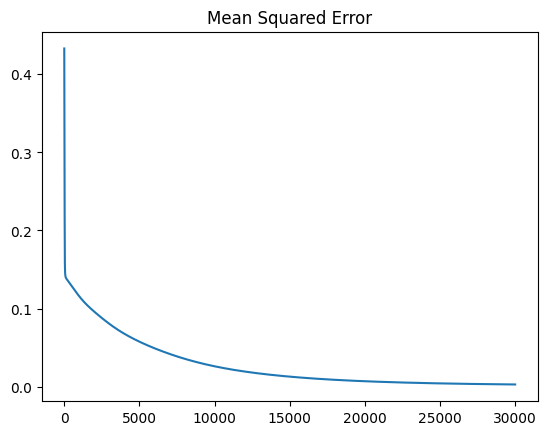

In [113]:
results.mse.plot(title="Mean Squared Error")
plt.show()

Протестируем на синтетическом примере для уксуса:

In [114]:
A1, A2 = feedforward_propagation([0.9, 0.13, 0.24, 0.35, 0.051, 0.12, 0.27, 0.2, 0.2, 0.5, 0.69], W1, W2)

In [115]:
pd.DataFrame([A2], columns=chemistry_df[chemistry_df.columns[-1]])

mixture,acetone,ammonia,isopropanol,no,vinegar,white_stroke
0,0.000022,0.015825,0.001885,0.100301,0.59487,0.037698


При небольшоим зашумлении он смог правильно определить уксус.

## ПРОГНОЗИРОВАНИЕ ВРЕМЕННЫХ РЯДОВ

**Цель** – разработать и исследовать нейронную сеть обратного распространения, предназначенную для прогнозирования временных серий, а также для анализа качества генератора случайных чисел.

Задание
1. Создать и обучить нейронную сеть, предназначенную для анализа
временных серий заданной размерности и отражающую структуру данных
серий.
2. Осуществить прогноз значений будущих элементов временных серий.
3. Проверить работу НС и определить точность прогноза по формуле:

    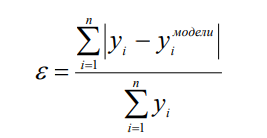

4. Создать и обучить две нейронные сети: предназначенную для анализа
временных серий заданной размерности (окно скольжения равно 4, шаг
скольжения S=1, период упреждения (шаг или глубина прогноза) m=1) и
для многофакторного прогнозирования (приложение 1).
5. Создать и обучить нейронную сеть для решения задачи многофакторного
прогнозирования (исходные данные взять из практической работы № 2).
Сравнить полученный результат по МГУА и НС.

Используем ту же нейронную сеть с обратным распространение ошибки и адаптируем её для решения задачи прогнозирования временных рядов.

Сгенерируем случайные данные для анализа:

In [186]:
data = [np.random.randint(0, 10) for _ in range(100)]

Вариант 1. Разбивка данных на столбец с параметрами и целевыми переменными.

In [187]:
data_df = pd.DataFrame([[i, x] for i, x in enumerate(data)], columns=['numb', 'rand'])
data_df

,numb,rand
0,0,6
1,1,2
2,2,2
3,3,4
4,4,8
...,...,...
95,95,2
96,96,7
97,97,5
98,98,3


Отмасшатибируем в пределах от 0 до 1:

In [188]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=['numb', 'rand'])

Исследуем на скоррелированность:

In [189]:
data_df.corr()

,numb,rand
numb,1.000000,0.008448
rand,0.008448,1.000000


Данные не скоррелированны.

Отобразим ряд.

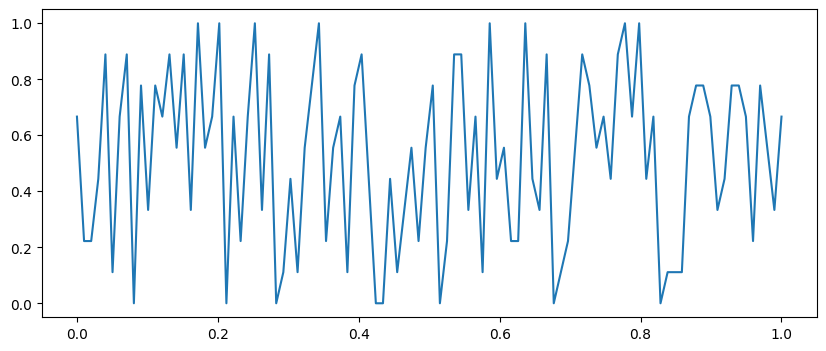

In [190]:
plt.figure(figsize = (10, 4))
plt.plot(data_df.numb, data_df.rand)
plt.show()

Разделим переменные, создадим выборку и обучим модель.

In [191]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values

In [192]:
X_train, X_test, y_train, y_test = X[:90], X[90:], y[:90], y[90:]

In [193]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=64, isMape=True)

epoch 0: 	mape: 5.0089033469775375
epoch 10000: 	mape: 1.790978602960663
epoch 20000: 	mape: 1.789519630780895
epoch 30000: 	mape: 1.7877293659720042
epoch 40000: 	mape: 1.7865109460773527
epoch 50000: 	mape: 1.7857781203056802
epoch 60000: 	mape: 1.785355576335917
epoch 70000: 	mape: 1.7851199216182045
epoch 80000: 	mape: 1.7849995424977345
epoch 90000: 	mape: 1.7849570991227115
epoch 100000: 	mape: 1.7849761253159842


Напишем функцию для конвертации значений в соответствии с их весами:

In [194]:
def converted(A2, scale=10):
    y_pred = []
    xmin, xmax = 0, scale-1
    for y_pr in A2:
        max_y, max_w = 0, 0
        for i, w in enumerate(y_pr):
            if w > max_w:
                max_y = i
                max_w = w
        y_pred.append(max_y)
    return (np.array(y_pred) - xmin)/(xmax-xmin)

Предскажем:

In [195]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

Отобразим на графике:

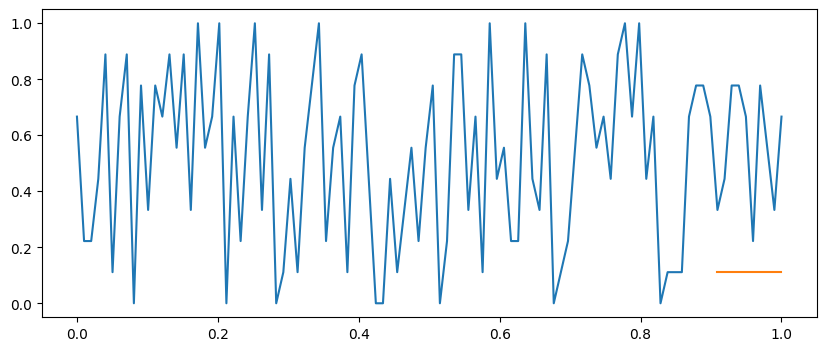

In [196]:
plt.figure(figsize = (10, 4))
plt.plot(data_df.numb, data_df.rand)
plt.plot(data_df.numb.values[90:], converted(A2))
plt.show()

Он взял среднее значение по всем значениям.

Посмотрим ошибку MAPE:

In [197]:
mape_ = mape(converted(A2), data_df.rand.values[90:])
mape_

0.7999999999999999

Плохие результаты, модель не может использоваться для прогнозирования временных рядов.

Вариант 2. Разбивка данных на столбец с параметрами и целевыми переменными с использованием окна в 10 значений. Тогда получится 90 обучающихся пар.

In [198]:
data_ = []
win = 0
while win != 90:
    data_.append(data[win:win+10] + [data[win+10]])
    win += 1

Составим датасет:

In [199]:
data_df = pd.DataFrame(data_, columns=[f'numb{i}' for i in range(10)]+['pred'])
data_df

,numb0,numb1,numb2,numb3,numb4,numb5,numb6,numb7,numb8,numb9,pred
0,6,2,2,4,8,1,6,8,0,7,3
1,2,2,4,8,1,6,8,0,7,3,7
2,2,4,8,1,6,8,0,7,3,7,6
3,4,8,1,6,8,0,7,3,7,6,8
4,8,1,6,8,0,7,3,7,6,8,5
...,...,...,...,...,...,...,...,...,...,...,...
85,1,6,7,7,6,3,4,7,7,6,2
86,6,7,7,6,3,4,7,7,6,2,7
87,7,7,6,3,4,7,7,6,2,7,5
88,7,6,3,4,7,7,6,2,7,5,3


Отмасштабируем:

In [200]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=[f'numb{i}' for i in range(10)]+['pred'])

Разделим выборки:

In [201]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values

In [202]:
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

Обучим:

In [203]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

epoch 0: 	mape: 6.20307883713279
epoch 10000: 	mape: 1.4047626460924343
epoch 20000: 	mape: 1.1674929503863716
epoch 30000: 	mape: 1.0428404370296653
epoch 40000: 	mape: 0.9249854917129314
epoch 50000: 	mape: 0.7981685737832234
epoch 60000: 	mape: 0.6937244089551853
epoch 70000: 	mape: 0.6161425030735842
epoch 80000: 	mape: 0.5554112331103431
epoch 90000: 	mape: 0.506269094302767
epoch 100000: 	mape: 0.4695551390458673


Предскажем:

In [204]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

Оценим ошибочность:

In [205]:
mape_ = mape(converted(A2), data_df.pred.values[80:])
mape_

0.31999999999999995

Посмотрим получившийся прогноз:

In [206]:
converted(A2)

array([0.66666667, 0.66666667, 0.11111111, 0.66666667, 0.88888889,
       0.22222222, 0.66666667, 0.44444444, 0.33333333, 0.66666667])

Построим график:

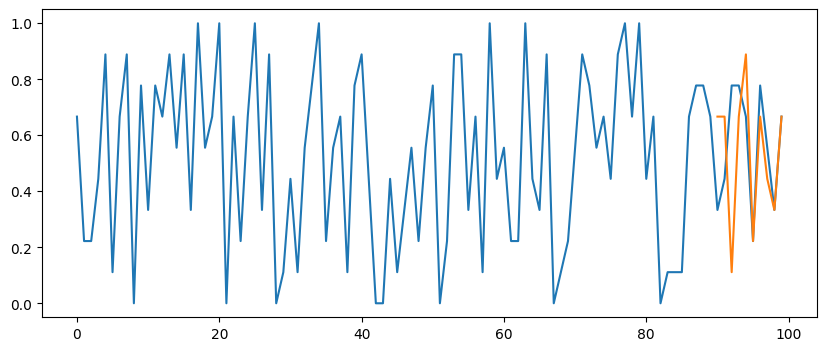

In [207]:
plt.figure(figsize = (10, 4))
plt.plot(range(100), list(data_df.loc[0][:10].values)+list(data_df.pred))
plt.plot(range(90, 100), converted(A2))
plt.show()

C окном качество модели сильно не изменилось, но она начала улавливать пикиЮ а не только среднее значение.

Проведем эксперимент для бОльшего разброса данных.

In [208]:
data = [np.random.randint(0, 100) for _ in range(100)]

Вариант 1. Аналогично повторим.

In [209]:
data_df = pd.DataFrame([[i, x] for i, x in enumerate(data)], columns=['numb', 'rand'])
data_df

,numb,rand
0,0,35
1,1,15
2,2,34
3,3,25
4,4,67
...,...,...
95,95,87
96,96,10
97,97,83
98,98,44


Масштабируем:

In [210]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=['numb', 'rand'])

Данные более также нескоррелированные.

In [211]:
data_df.corr()

,numb,rand
numb,1.000000,0.123694
rand,0.123694,1.000000


Строим график:

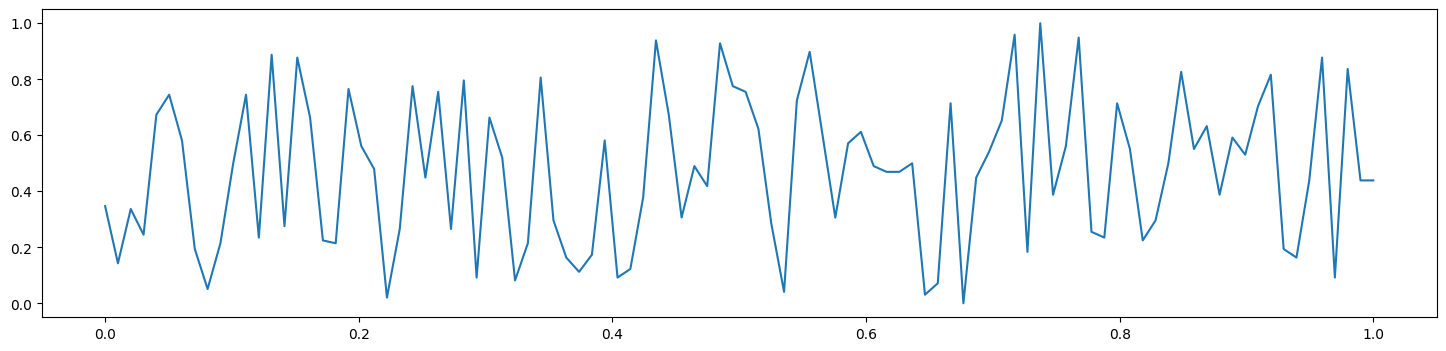

In [212]:
plt.figure(figsize = (18, 4))
plt.plot(data_df.numb, data_df.rand)
plt.show()

Явных закономерностей не наблюдается.

Разделим данные:

In [213]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values
X_train, X_test, y_train, y_test = X[:90], X[90:], y[:90], y[90:]

Обучим:

In [214]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

epoch 0: 	mape: 32.59081416919797
epoch 10000: 	mape: 1.9400946361867069
epoch 20000: 	mape: 1.9718068832090423
epoch 30000: 	mape: 2.000916418576515
epoch 40000: 	mape: 2.034167630644396
epoch 50000: 	mape: 2.047315748775387
epoch 60000: 	mape: 2.0570726068241023
epoch 70000: 	mape: 2.0647901664031356
epoch 80000: 	mape: 2.0708122462378666
epoch 90000: 	mape: 2.0751307558599237
epoch 100000: 	mape: 2.0777110825272675


Предскажем:

In [215]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

График:

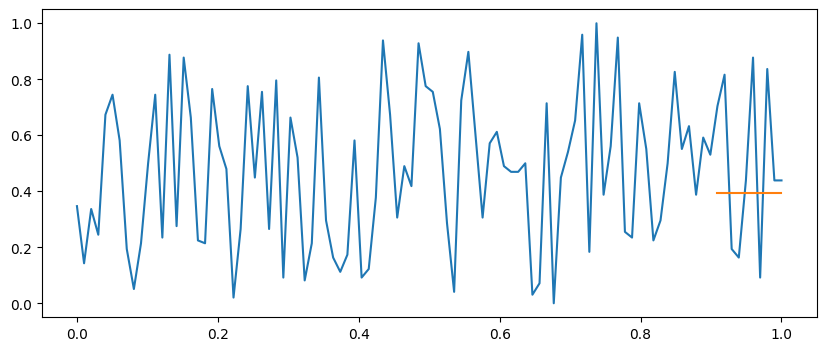

In [216]:
plt.figure(figsize = (10, 4))
plt.plot(data_df.numb, data_df.rand)
plt.plot(data_df.numb.values[90:], converted(A2, scale=100))
plt.show()

Оценим качество по ошибке:

In [217]:
mape_ = mape(converted(A2, scale=100), data_df.rand.values[90:])
mape_

0.505256648113791

Модель меньше ошибается в абсолютных величинах.

Вариант 2. Посмотрим результат анализа временных рядов с окном.

Окно в 10 значений для формирования 90 пар.

In [218]:
data_ = []
win = 0
while win != 90:
    data_.append(data[win:win+10] + [data[win+10]])
    win += 1

Составим датасет:

In [219]:
data_df = pd.DataFrame(data_, columns=[f'numb{i}' for i in range(10)]+['pred'])
data_df

,numb0,numb1,numb2,numb3,numb4,numb5,numb6,numb7,numb8,numb9,pred
0,35,15,34,25,67,74,58,20,6,22,50
1,15,34,25,67,74,58,20,6,22,50,74
2,34,25,67,74,58,20,6,22,50,74,24
3,25,67,74,58,20,6,22,50,74,24,88
4,67,74,58,20,6,22,50,74,24,88,28
...,...,...,...,...,...,...,...,...,...,...,...
85,55,63,39,59,53,70,81,20,17,44,87
86,63,39,59,53,70,81,20,17,44,87,10
87,39,59,53,70,81,20,17,44,87,10,83
88,59,53,70,81,20,17,44,87,10,83,44


Отмасштабируем:

In [220]:
scaler = MinMaxScaler()
scaler.fit(data_df)
data_df = pd.DataFrame(scaler.transform(data_df), columns=[f'numb{i}' for i in range(10)]+['pred'])

Разделим выборки:

In [221]:
X = data_df[data_df.columns[:-1]]
y = pd.get_dummies(data_df[data_df.columns[-1]]).values
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

Обучим:

In [222]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

epoch 0: 	mape: 36.07264606969719
epoch 10000: 	mape: 2.2115497551246035
epoch 20000: 	mape: 1.9363488686596853
epoch 30000: 	mape: 1.672018722665203
epoch 40000: 	mape: 1.4329973871774935
epoch 50000: 	mape: 1.212331724870173
epoch 60000: 	mape: 1.0128558393490577
epoch 70000: 	mape: 0.8901903817053369
epoch 80000: 	mape: 0.8170064176735654
epoch 90000: 	mape: 0.7433233222360759
epoch 100000: 	mape: 0.6627352081960233


Оценим MAPE:

In [223]:
mape_ = mape(converted(A2, scale=100), data_df.pred.values[80:])
mape_

0.505256648113791

Выведем спрогнозированные результаты:

In [224]:
converted(A2, scale=100)

array([0.39393939, 0.39393939, 0.39393939, 0.39393939, 0.39393939,
       0.39393939, 0.39393939, 0.39393939, 0.39393939, 0.39393939])

Отобразим на графике:

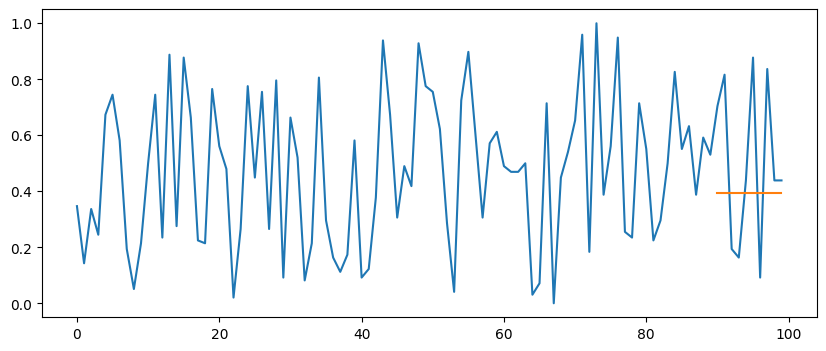

In [225]:
plt.figure(figsize = (10, 4))
plt.plot(range(100), list(data_df.loc[0][:10].values)+list(data_df.pred))
plt.plot(range(90, 100), converted(A2, scale=100))
plt.show()

Метрика MAPE упала, однако результат точности и ошибки все равно не позволяют сказать, что модель смогла найти закономерность.

Проанализируем ряды реальных данных:

In [226]:
dataset = pd.read_csv('dataset.csv', sep=' ')
dataset

,Годы,y,x1,x2,x3,x4,x5
0,1990,475.3,0.986,0.978,0.970,1.060,0.880
1,1991,413.5,0.876,0.858,0.870,1.082,0.840
2,1992,401.7,0.699,0.690,0.764,1.104,0.480
3,1993,400.9,0.605,0.619,0.685,1.126,0.475
4,1994,401.3,0.514,0.559,0.566,1.148,0.525
5,1995,402.5,0.483,0.492,0.534,1.170,0.575
6,1996,401.1,0.459,0.501,0.570,1.230,0.582
7,1997,404.4,0.464,0.506,0.593,1.304,0.539
8,1998,406.2,0.478,0.430,0.640,1.336,0.512
9,1999,412.2,0.507,0.587,0.695,1.370,0.519


Построим график:

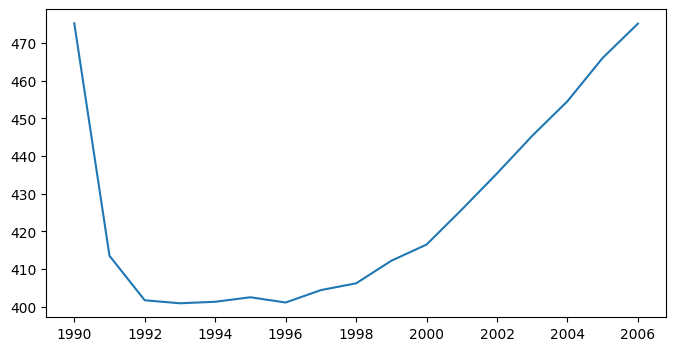

In [227]:
plt.figure(figsize = (8, 4))
plt.plot(dataset['Годы'], dataset.y)
plt.show()

Входными переменными будут значения X, а выходной - y. Попробуем спрогнозировать значения.

In [228]:
X = dataset[['x1', 'x2', 'x3', 'x4', 'x5']].values
y = pd.get_dummies(dataset['y']).values
X_train, X_test, y_train, y_test = X[:15], X[15:], y[:15], y[15:]

Обучим:

In [229]:
W1, W2, results = backpropagation(X_train, y_train, epoch = 100000, learning_rate=0.1, hidden_size=128, isMape=True)

epoch 0: 	mape: 8.067652161429509
epoch 10000: 	mape: 1.7943226308843452
epoch 20000: 	mape: 1.681426931460858
epoch 30000: 	mape: 1.5644463788729557
epoch 40000: 	mape: 1.450417420481183
epoch 50000: 	mape: 1.335041382973609
epoch 60000: 	mape: 1.2275811840763533
epoch 70000: 	mape: 1.1271945136268735
epoch 80000: 	mape: 1.0352716684768086
epoch 90000: 	mape: 0.9556559170505572
epoch 100000: 	mape: 0.8880913895233827


Оценим MAPE:

In [234]:
W1.shape

(5, 128)

In [236]:
W2.shape

(128, 17)

In [230]:
A1, A2 = feedforward_propagation(X_test, W1, W2)

In [231]:
mape(np.array([425.8, 435.4]), np.array([466.1, 475.2]))

0.08509508127058327

Оценим график:

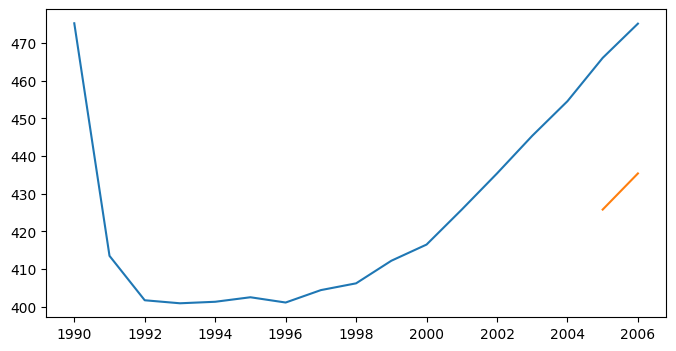

In [232]:
plt.figure(figsize = (8, 4))
plt.plot(dataset['Годы'], dataset.y)
plt.plot(dataset['Годы'][-2:], np.array([425.8, 435.4]))
plt.show()

Конечный результат довольно плохой, модель не подходит для прогнозирования временных рядов.